In [2]:
import wandb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Initialize the API
api = wandb.Api()

# Specify your project details
entity = "haeri-hsn"  # Replace with your wandb entity
project = "stream_learning"  # Replace with your wandb project name

# Define filters
filters = {
    'state': 'finished',  # Only fetch finished runs
    'tags': {'$in': ['teconer_final']}  # Runs containing a specific tag msmsa_horizon_analysis_melbourne_housing \ msmsa_anchor_analysis_melbourne_housing
}

# Query runs with filters
runs = api.runs(f"{entity}/{project}", filters=filters)

# print number of runs
print(f"Number of runs: {len(runs)}")

Number of runs: 309


In [7]:
# Extract data from each run
summary_list = []
config_list = []
name_list = []
for run in runs:
    # run.summary contains the output of the training
    summary_list.append(run.summary._json_dict)

    # run.config contains the hyperparameters
    config_list.append({k: v for k, v in run.config.items() if not k.startswith('_')})

    # run.name is the name of the run.
    name_list.append(run.name)

# Convert to DataFrame
summary_df = pd.DataFrame.from_records(summary_list)
config_df = pd.DataFrame.from_records(config_list)
name_df = pd.DataFrame({'name': name_list})

# Combine all parts into one DataFrame
df = pd.concat([name_df, config_df, summary_df], axis=1)

# Display the DataFrame
print(df.columns)

Index(['name', 'seed', 'tags', 'dataset', 'epsilon', 'wandb_log',
       'base_learner', 'online_model', '_runtime', '_timestamp',
       'learning_model', 'metric_RMSE', 'online_models', 'preview_duration',
       'TMI', 'metric_R2', 'metric_MAE', 'average_records_per_trip', '_wandb',
       'dataset', 'average_ahead_records', '_step'],
      dtype='object')


KeyboardInterrupt: 

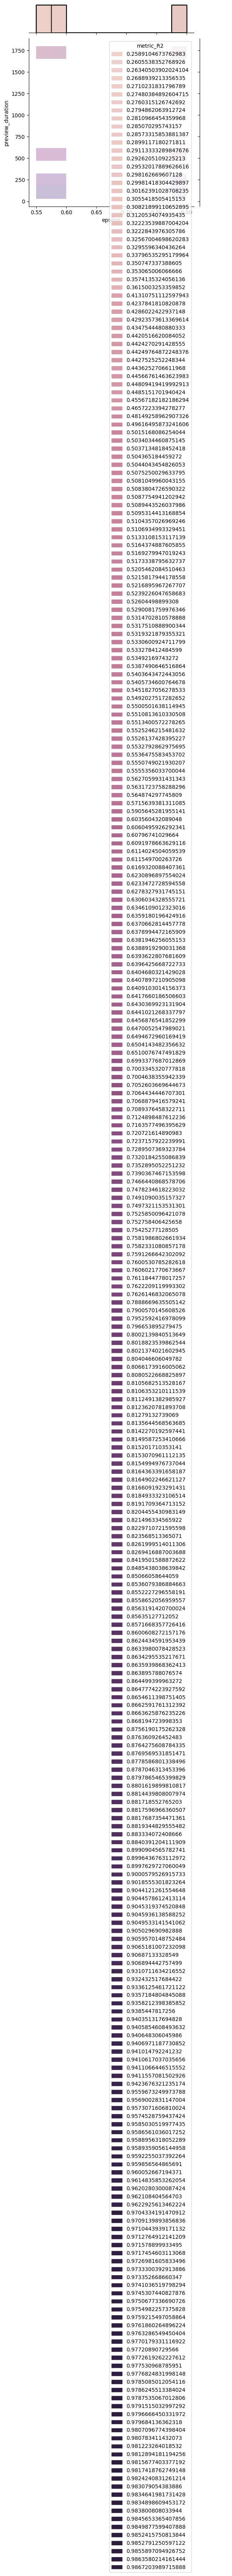

In [9]:
df_ = df[df]
sns.jointplot(data=df_, x="epsilon", y="preview_duration", hue="metric_R2", kind="hist")